In [1]:
import requests
from bs4  import BeautifulSoup
import csv
import time
from datetime import datetime
from urllib.request import urlopen
import pandas as pd

open_api_key = 'b11FuVZws1x5zxqr1hFoCuu%2BdUk0qC1h%2FxMmDXi9aeGU1TfRc%2B0UEPhCMzLznh8gC8wZkcMgAV%2FdvkpJqHq9Ng%3D%3D'
params = '&numOfRows=10&pageNo=1&itemCode=PM10&dataGubun=HOUR&searchCondition=WEEK'
open_url = 'http://openapi.airkorea.or.kr/openapi/services/rest/ArpltnInforInqireSvc/getCtprvnMesureLIst?ServiceKey=' + open_api_key + params + '&_returnType=json'

res = requests.get(open_url)
if res:
    print('ok')
else:
    print('no')

ok


In [2]:
import json
import pandas as pd

text = res.text

pm10Data = json.loads(text)
pm10Len = len(pm10Data['list'])
pm10DF = pd.DataFrame()
pm10DF = pm10DF.append({"seoul":"","busan":"","daegu":"","incheon":"","gwangju":"","daejeon":"","ulsan":"","gyeonggi":"","gangwon":"","chungbuk":"","chungnam":"","jeonbuk":"","jeonnam":"","gyeongbuk":"","gyeongnam":"","jeju":"",},ignore_index=True, sort=False)

In [3]:
for i in range(pm10Len):
    pm10DF.loc[i,"seoul"] = pm10Data['list'][i]['seoul']
    pm10DF.loc[i,"busan"] = pm10Data['list'][i]['busan']
    pm10DF.loc[i,"daegu"] = pm10Data['list'][i]['daegu']
    pm10DF.loc[i,"incheon"] = pm10Data['list'][i]['incheon']
    pm10DF.loc[i,"gwangju"] = pm10Data['list'][i]['gwangju']
    pm10DF.loc[i,"daejeon"] = pm10Data['list'][i]['daejeon']
    pm10DF.loc[i,"ulsan"] = pm10Data['list'][i]['ulsan']
    pm10DF.loc[i,"gyeonggi"] = pm10Data['list'][i]['gyeonggi']
    pm10DF.loc[i,"gangwon"] = pm10Data['list'][i]['gangwon']
    pm10DF.loc[i,"chungbuk"] = pm10Data['list'][i]['chungbuk']
    pm10DF.loc[i,"chungnam"] = pm10Data['list'][i]['chungnam']
    pm10DF.loc[i,"jeonbuk"] = pm10Data['list'][i]['jeonbuk']
    pm10DF.loc[i,"jeonnam"] = pm10Data['list'][i]['jeonnam']
    pm10DF.loc[i,"gyeongbuk"] = pm10Data['list'][i]['gyeongbuk']
    pm10DF.loc[i,"gyeongnam"] = pm10Data['list'][i]['gyeongnam']
    pm10DF.loc[i,"jeju"] = pm10Data['list'][i]['jeju']

In [4]:
pm10DF.head(10)

,busan,chungbuk,chungnam,daegu,daejeon,gangwon,gwangju,gyeongbuk,gyeonggi,gyeongnam,incheon,jeju,jeonbuk,jeonnam,seoul,ulsan
0,15,13,16,17,14,10,11,16,12,8,12,23,10,14,9,20
1,18,13,13,18,13,10,10,17,12,8,13,18,9,13,10,23
2,20,14,12,16,11,10,8,18,13,11,14,15,10,12,10,24
3,19,15,13,17,14,12,6,20,15,12,16,13,9,11,12,25
4,20,16,17,17,14,15,6,23,17,14,19,8,10,9,13,25
5,22,19,19,19,14,14,6,25,19,16,20,8,10,9,16,29
6,23,20,21,27,17,16,6,26,21,19,22,10,13,11,17,32
7,25,25,23,33,21,17,8,26,22,23,24,10,13,13,20,33
8,24,25,24,36,23,19,11,25,23,24,23,20,19,16,21,35
9,23,24,26,34,24,19,14,25,23,26,22,23,21,16,21,28


In [5]:
pm10DF_ulsan = pm10DF['ulsan']

In [6]:
pm10DF.to_csv("xmlproj.csv",header=False,index=False)

In [7]:
pm10DF_chungbuk = pm10DF['chungbuk']

In [8]:
pm10DF.mean()

busan        1.518202e+18
chungbuk     1.313142e+18
chungnam     1.613121e+18
daegu        1.718162e+18
daejeon      1.413111e+18
gangwon      1.010101e+18
gwangju      1.110867e+12
gyeongbuk    1.617182e+18
gyeonggi     1.212132e+18
gyeongnam    8.811121e+16
incheon      1.213142e+18
jeju         2.318151e+16
jeonbuk      1.091091e+16
jeonnam      1.413121e+16
seoul        9.101012e+17
ulsan        2.023243e+18
dtype: float64

In [9]:
import matplotlib.pyplot as plt
x = list(range(len(pm10DF_ulsan)))


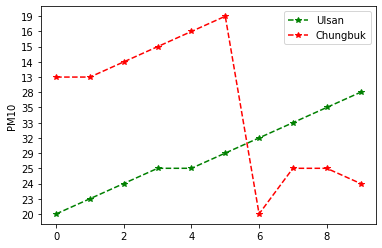

In [27]:
plt.plot(x, pm10DF_ulsan, 'g*--', label='Ulsan')
plt.plot(x, pm10DF_chungbuk,  'r*--', label='Chungbuk')
plt.ylabel('PM10')
plt.legend()
plt.show()

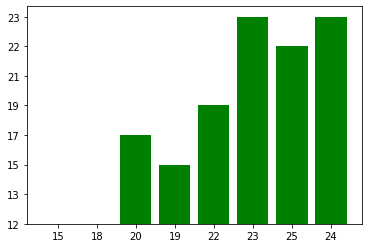

In [11]:
plt.bar(pm10DF['busan'], pm10DF['gyeonggi'],color='g')
plt.show()

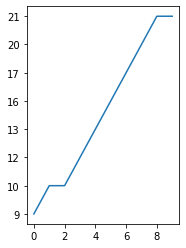

In [12]:
fig=plt.figure()
ax1=fig.add_subplot(1,2,1)
ax1.plot(pm10DF['seoul'])

In [13]:
pm10DF.max()

busan        25.0
chungbuk     25.0
chungnam     26.0
daegu        36.0
daejeon      24.0
gangwon      19.0
gwangju       8.0
gyeongbuk    26.0
gyeonggi     23.0
gyeongnam     8.0
incheon      24.0
jeju          8.0
jeonbuk       9.0
jeonnam       9.0
seoul         9.0
ulsan        35.0
dtype: float64

In [14]:
pm10DF.iloc[1].max()

'9'

In [15]:
pm10DF.min()

busan        15.0
chungbuk     13.0
chungnam     12.0
daegu        16.0
daejeon      11.0
gangwon      10.0
gwangju      10.0
gyeongbuk    16.0
gyeonggi     12.0
gyeongnam    11.0
incheon      12.0
jeju         10.0
jeonbuk      10.0
jeonnam      11.0
seoul        10.0
ulsan        20.0
dtype: float64

In [17]:
pm10DF_ulsan.to_csv("ulsan.csv",header=False,index=False)
pm10DF_chungbuk.to_csv("chungbuk.csv",header=False,index=False)